# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this project, we are using deep learning to learn and classify German traffic signs. The following steps are used for this purpose:

---
## Step 0: Load The Data

First, the required libraries are imported.

In [1]:
import tensorflow as tf
import random
import numpy as np

import matplotlib.pyplot as plt
import cv2

%matplotlib inline

Then, the train, test and validation datasets are loaded.

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

The following section, python numpy and pandas libraries are used to obtain information about thee number and shape of samples in the train, validation and test groupds.

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

#### Histograms: 

Now a histogram is drawn based on sample distribution between different labels in all the datasets. It can be seen that some labels are represented by far more samples than the others.

(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

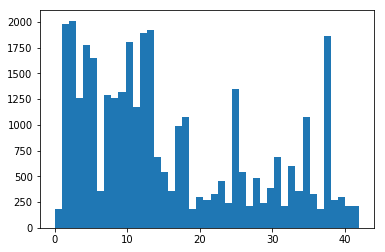

In [4]:
plt.hist(y_train,bins=n_classes)

(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

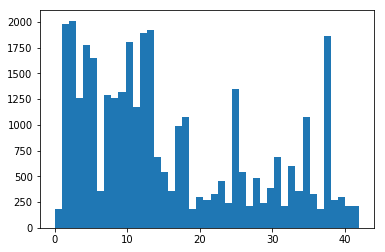

In [5]:
plt.hist(y_train,bins=n_classes)

(array([  30.,  240.,  240.,  150.,  210.,  210.,   60.,  150.,  150.,
         150.,  210.,  150.,  210.,  240.,   90.,   90.,   60.,  120.,
         120.,   30.,   60.,   60.,   60.,   60.,   30.,  150.,   60.,
          30.,   60.,   30.,   60.,   90.,   30.,   90.,   60.,  120.,
          60.,   30.,  210.,   30.,   60.,   30.,   30.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

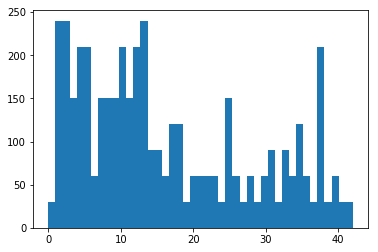

In [6]:
plt.hist(y_valid,bins=n_classes)

(array([  60.,  720.,  750.,  450.,  660.,  630.,  150.,  450.,  450.,
         480.,  660.,  420.,  690.,  720.,  270.,  210.,  150.,  360.,
         390.,   60.,   90.,   90.,  120.,  150.,   90.,  480.,  180.,
          60.,  150.,   90.,  150.,  270.,   60.,  210.,  120.,  390.,
         120.,   60.,  690.,   90.,   90.,   60.,   90.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

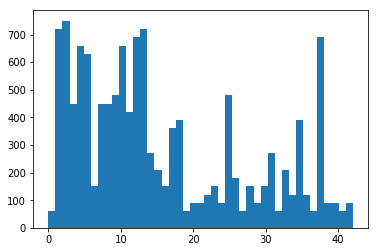

In [7]:
plt.hist(y_test,bins=n_classes)

#### Dataset Images:

In this section, examples of each class of the data are presented:

In [8]:
def visualize_set(X,y):
    im=[]
    lb=[]

    for i in range(0, len(X)):
        lab = y[i]
        if lab not in lb:
            lb.append(lab)
            im.append(i)

    plt.figure(figsize=(15,8))
    columns = 11
    
    im2=[x for _, x in sorted(zip(lb,im), key=lambda pair: pair[0])]
    
    for i in range(len(lb)):
        
        plt.subplot(len(im) / columns + 1, columns, i + 1)
        plt.imshow(X[im2[i]])

    

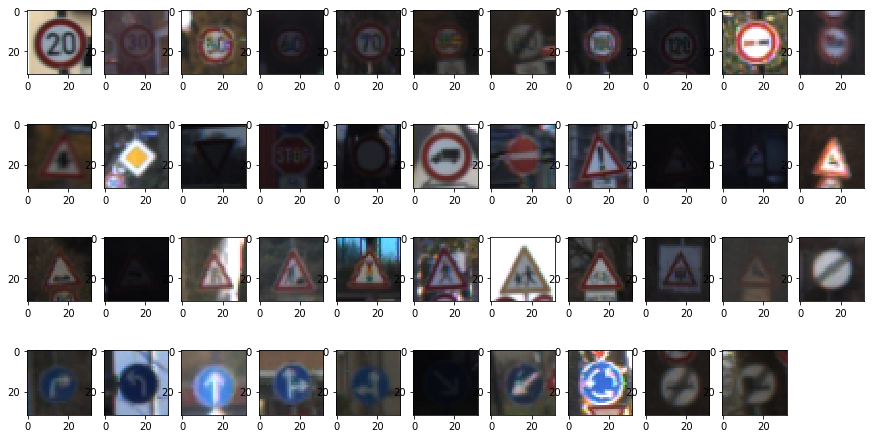

In [9]:
visualize_set(X_train,y_train)

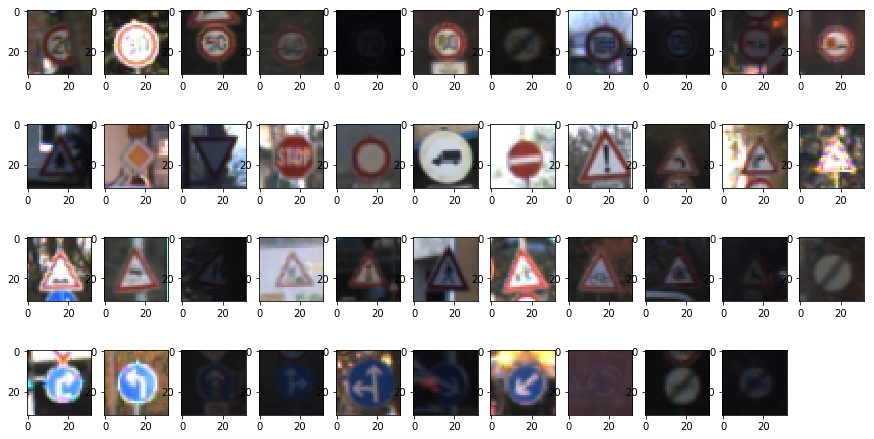

In [10]:
visualize_set(X_valid,y_valid)

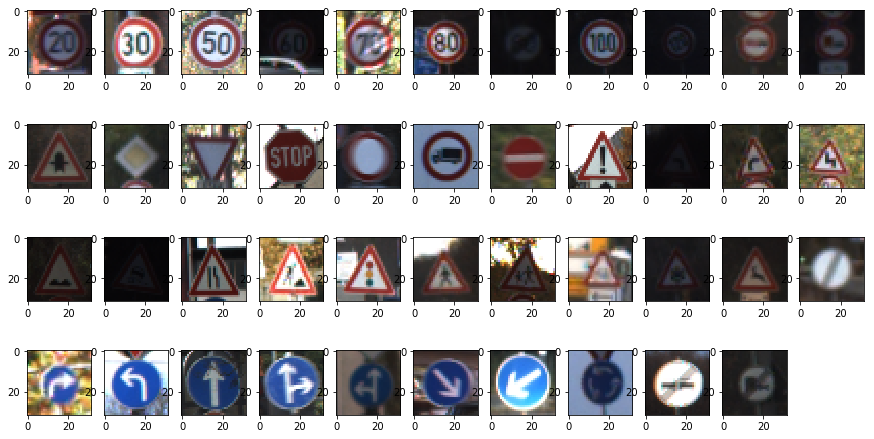

In [11]:
visualize_set(X_test,y_test)

It can be seen that the train, validation and test sets include different images of all the 43 labels.

----

## Step 2: Design and Test a Model Architecture


### Data Augmentation

Data augmentation has two advantages: 
1. Increasing the data will lead to better training and thus more accurate results.
1. Since some classes of the data have far less samples than the others, augmentation keeps them from being neglected by the more populated classes.

Rotation and Translation are used as augmentation techniques in this project.

In [12]:
def rotation(image,ang_range=30):
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    #rows,cols,ch = image.shape
    #rows,cols = image.shape
    rows,cols = image.shape[:-1]   
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    return image

def translation(image,trans_range=6):
    #rows,cols,ch = image.shape
    #rows,cols = image.shape
    rows,cols = image.shape[:-1]   
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    return image
    
def original(img): 
    return img

38


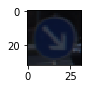

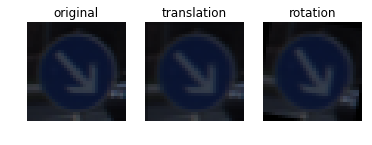

In [13]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])



fig, ax = plt.subplots(1,3, figsize=(6,2))
for i,transform in enumerate([original, translation, rotation]):
    tr_img = transform(image)
    ax[i].imshow(tr_img)
    ax[i].axis('off')
    ax[i].set_title(transform.__name__)

In [14]:
translation_random = lambda img : translation(img, trans_range=random.randint(-2,2))
rotation_random = lambda img : rotation(img, ang_range=random.uniform(-20.,20.))


def random_transform(img) :
    new_img = img
    r=random.randint(1,6)
    if r<3:
        new_img = translation_random(new_img)
    else:
        new_img = rotation_random(new_img)
    
    return new_img


In [15]:
def augmentation_data(X,y,des):
    n_classes=len(set(y))
    class_count=np.bincount(y)
    for no in range(0,n_classes):
        if class_count[no]<des:
            newx=[]
            newy=[]
            for i in range(0,des-class_count[no]):
                pics=np.where(y==no)
                newimg=random_transform(X[pics[0]][random.randint(0,class_count[no]-1)])
                newy.append(no)
                newx.append(newimg)
            X=np.append(X,np.array(newx),axis=0)
            y=np.append(y,np.array(newy),axis=0)
            
    return X,y




####Check the dimension of newx and compare with X_train

(array([ 2500.,  2500.,  2500.,  2500.,  2500.,  2500.,  2500.,  2500.,
         2500.,  2500.,  2500.,  2500.,  2500.,  2500.,  2500.,  2500.,
         2500.,  2500.,  2500.,  2500.,  2500.,  2500.,  2500.,  2500.,
         2500.,  2500.,  2500.,  2500.,  2500.,  2500.,  2500.,  2500.,
         2500.,  2500.,  2500.,  2500.,  2500.,  2500.,  2500.,  2500.,
         2500.,  2500.,  2500.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

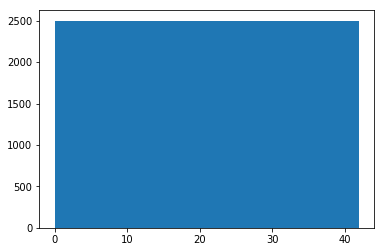

In [16]:
X_train, y_train = augmentation_data(X_train,y_train,2500)
plt.hist(y_train,bins=n_classes)

It can be seen that now all the classes in the train set have 2500 samples. Therefore the classifier will not be biased and all classes have an equal chance of being trained.

41


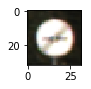

In [19]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

### Pre-process the Data Set (normalization, grayscale, etc.)

After the data is augmented, all the instances must be preprocessed ss the classifier can have a better performance.

In this project, averaging and normalizeing are used as the preprocessing steps.
Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel/255)-0.5` is a quick way to approximately normalize the data and can be used in this project. 



In [20]:
def normalize(input):
    min_d=input.min()
    max_d=input.max()
    a=0.1
    b=0.9
    #out=a+(input-min_d)*(b-a)/(max_d-min_d)
    out=(input/255.0)-0.5
    return out

In [21]:
import numpy as np
#X_train=tf.image.rgb_to_grayscale(X_train)
#X_valid=tf.image.rgb_to_grayscale(X_valid)
#X_test=tf.image.rgb_to_grayscale(X_test)
X_train=np.sum(X_train/3,axis=3,keepdims=True)
X_valid=np.sum(X_valid/3,axis=3,keepdims=True)
X_test=np.sum(X_test/3,axis=3,keepdims=True)
X_train=normalize(X_train)
X_valid=normalize(X_valid)
X_test=normalize(X_test)


In [23]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

LeNet5 which was discussed in the classroom is used as the model architecute in this project. However, the numbe rof classes is changed to 43 to be compatible in this project.

The LeNet network is as follows:
- Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    Pooling. Input = 28x28x6. Output = 14x14x6.

- Layer 2: Convolutional. Output = 10x10x16.
    RELU Activation.
    Pooling. Input = 10x10x16. Output = 5x5x16.
    Flatten. Input = 5x5x16. Output = 400.

- Layer 3: Fully Connected. Input = 400. Output = 120.
    RELU Activation.
    Dropout
    
- Layer 4: Fully Connected. Input = 120. Output = 84.
    RELU Activation.
    Dropout

- Layer 5: Fully Connected. Input = 84. Output = 43.

- Dropouts: in fully connected networks reduces overfitting by removing some of the samples, so the network does not rely on any given activation. In summary, dropouts can improve learning performance by increasing randomization.

- Pooling: pooling may be consider a technique to compress or generalize feature representations and generally reduce the overfitting of the training data by the model.

- Fully connected layers are used at the end of the network after feature extraction and consolidation has been performed by the convolutional and pooling layers. They are used to create final non-linear combinations of features and for making predictions by the network.

- Optimization: Adam optimizaer is used for finding weights and biases with back propagation.

In [24]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 64

In [25]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    wc1=tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    bc1= tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, wc1, strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, bc1)
    # TODO: Activation.
    conv1=tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.

    conv1=tf.nn.max_pool(
        conv1,
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        padding='VALID')
    # Layer 2: Convolutional. Output = 10x10x16.
    
    wc2=tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    bc2= tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, wc2, strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, bc2)
    # Activation.
    conv2=tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2=tf.nn.max_pool(
        conv2,
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        padding='SAME')

    # Flatten. Input = 5x5x16. Output = 400.
    fc1=tf.contrib.layers.flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    w1=tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    b1= tf.Variable(tf.zeros(120))
    fc1 = tf.add(tf.matmul(fc1, w1), b1)
    
    # Activation.
    fc1=tf.nn.relu(fc1)
    fc1=tf.nn.dropout(fc1,keep_p)
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    w2=tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    b2=tf.Variable(tf.zeros(84))
    fc2 = tf.add(tf.matmul(fc1, w2), b2)
    # Activation.
    fc2=tf.nn.relu(fc2)
    fc2=tf.nn.dropout(fc2,keep_p)
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    w3=tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    b3= tf.Variable(tf.zeros(n_classes))
    logits = tf.add(tf.matmul(fc2, w3), b3)
    logits=tf.nn.dropout(logits,keep_p)
    return logits

In [26]:
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1],1))
y = tf.placeholder(tf.int32, (None))
keep_p = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [27]:
##TRAIN
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [28]:
##EVALUATION

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_p:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [29]:
##TRAIN MODEL

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_p:0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.871

EPOCH 2 ...
Validation Accuracy = 0.920

EPOCH 3 ...
Validation Accuracy = 0.937

EPOCH 4 ...
Validation Accuracy = 0.939

EPOCH 5 ...
Validation Accuracy = 0.948

EPOCH 6 ...
Validation Accuracy = 0.947

EPOCH 7 ...
Validation Accuracy = 0.955

EPOCH 8 ...
Validation Accuracy = 0.954

EPOCH 9 ...
Validation Accuracy = 0.954

EPOCH 10 ...
Validation Accuracy = 0.967

EPOCH 11 ...
Validation Accuracy = 0.954

EPOCH 12 ...
Validation Accuracy = 0.965

EPOCH 13 ...
Validation Accuracy = 0.963

EPOCH 14 ...
Validation Accuracy = 0.970

EPOCH 15 ...
Validation Accuracy = 0.970

EPOCH 16 ...
Validation Accuracy = 0.966

EPOCH 17 ...
Validation Accuracy = 0.970

EPOCH 18 ...
Validation Accuracy = 0.964

EPOCH 19 ...
Validation Accuracy = 0.973

EPOCH 20 ...
Validation Accuracy = 0.974

Model saved


In [30]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.941


---

## Step 3: Test a Model on New Images

In this section, ten traffic sign images are downloaded from Google images for evaluation of the traffic sign classifier. The file `<signnames.csv>` contains mapping from the class id to the sign name, and is used for better identifying the modle predictions.

### Load and Output the Images

In [35]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import pandas as pd

signnames=pd.read_csv('signnames.csv')
signnames.head(10)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


#### Importing the new images

The new images are imported in this step and normalized to be ready for the classifier.

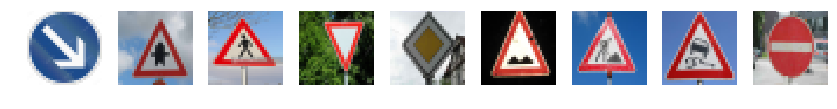

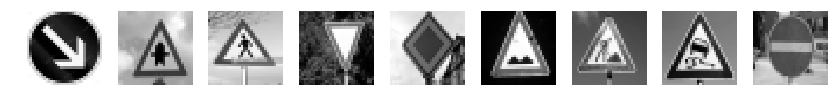

In [36]:
import glob

def load_image(name):
    image = plt.imread(name)
    image = cv2.resize(image,(32,32), interpolation=cv2.INTER_AREA)
    return image

example_images = []
example_labels = []

for img_name in glob.glob('./MySigns/*.jpg'):
    image = load_image(img_name)
    #img_class = re.search('class(.*?).png', img_name).group(1)
    example_images.append(image)
    #example_labels.append(int(img_class))
    

# Show original example images
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(3)

for index, image in enumerate(example_images):
    ax = fig.add_subplot(2, 10, index + 1)
    ax.axis('off')
    ax.imshow(image)


X_new_examples = np.array(example_images)
X_new_examples =np.sum(X_new_examples/3,axis=3,keepdims=True)
X_new_examples =normalize(X_new_examples)


# Show preprocessed example images
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(3)

for index, image in enumerate(X_new_examples):
    ax = fig.add_subplot(2, 10, index + 1)
    ax.axis('off')
    img = X_new_examples[index].squeeze()
    plt.imshow(img, cmap='gray')

##### Possible issues: 

Out of these images, the "priority road" sign has low quality and the "No Entry" sign has a crowded background which may affect the prediction performance.

### Analyze Performance

### Predict the Sign Type for Each Image
In this step, the sign of each image is predcted:

In [39]:
signnames=pd.read_csv('signnames.csv')
signnames

n_examples=len(X_new_examples)

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('lenet.meta')  
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))        
    predicted_logits = sess.run(logits, feed_dict={x: X_new_examples,keep_p: 1 })
    predicted_labels = np.argmax(predicted_logits, axis=1)
    labels_predicted = tf.nn.softmax(logits)
    top_5 = tf.nn.top_k(labels_predicted, 5)
    top_5_predictions = sess.run(top_5, feed_dict={x: X_new_examples, keep_p: 1})
    y_prob, y_pred = sess.run(top_5, feed_dict={x: X_new_examples, keep_p: 1})

print('The Ground truth is:',[38, 11, 18, 13, 12, 22, 25, 23, 17])
print('predictions are:',predicted_labels)

for i in range(n_examples):
    l=predicted_labels[i]
    name = signnames.iloc[l]['SignName']
    print('The predicted label is',l,'which corresponds to the Sign:',name)
    


The Ground truth is: [38, 11, 18, 13, 12, 22, 25, 23, 17]
predictions are: [38 11 18 13 12 22 25 23 17]
The predicted label is 38 which corresponds to the Sign: Keep right
The predicted label is 11 which corresponds to the Sign: Right-of-way at the next intersection
The predicted label is 18 which corresponds to the Sign: General caution
The predicted label is 13 which corresponds to the Sign: Yield
The predicted label is 12 which corresponds to the Sign: Priority road
The predicted label is 22 which corresponds to the Sign: Bumpy road
The predicted label is 25 which corresponds to the Sign: Road work
The predicted label is 23 which corresponds to the Sign: Slippery road
The predicted label is 17 which corresponds to the Sign: No entry


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, the model's softmax probabilities to show the certainty of the model's predictions are shown.(Here the output is limited to top 5 probabilities for each image). 


The classification accuracy is:  100.0 %


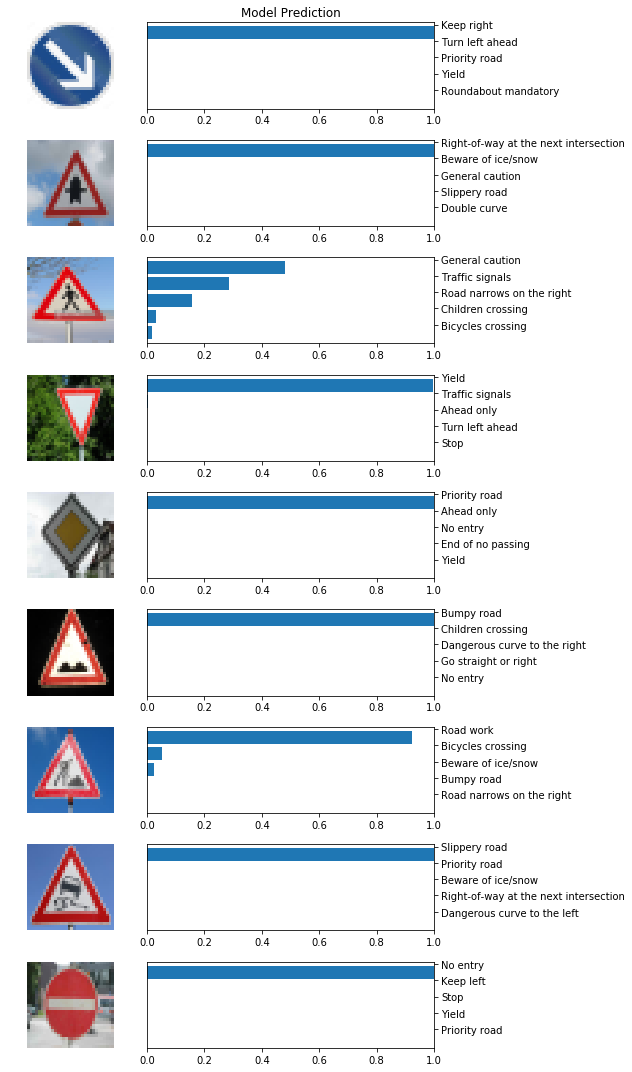

In [40]:
X_data=example_images

fig, ax = plt.subplots(n_examples, 2,figsize=(10,15))
    
#X_data_proc = np.zeros(X_data.shape)
for i in range(n_examples):
    labels = y_pred[i]
    names = [signnames.iloc[l]['SignName'] for l in labels]
    bar_locations = np.arange(5)[::-1]
    ax[i,0].imshow(X_data[i])
    ax[i,0].axis('off')
    ax[i,1].barh(bar_locations, y_prob[i])
    ax[i,1].set_yticks(0.5+bar_locations)
    ax[i,1].set_yticklabels(names)
    ax[i,1].yaxis.tick_right()
    ax[i,1].set_xlim([0,1])
ax[0,1].set_title('Model Prediction')
fig.tight_layout()

print ('The classification accuracy is: ',(9/9)*100,'%' )

It can be seen that the classifier has predicted all the signs correctly. However, for the "General Caution" and "Road Work" signs the classifier considered other signs as well, which could be because of the low quality of the image and similarity to other signs.

#### Comparison with the test set

As seen before, the prediction accuracy of new traffic images is 100%, while the test set accuracy was 94%.
In my opinion this difference is because of two reasons:

1- The test dataset is much larger than the 9 images used here. therefore, the probability of an error increases. Even in this small 9 image set some minor errors occured for classification of the 'general caution' and 'road work' signs. So it is perfectly normal for some error to occure in classifying the 12600 samples in the test set.

2- From the visualization section it is noticed that som eof the samples in the test set are low quality, dark or disorted, in a degree that is hard for humans to recognize. Such problems increase the probability of being missclassified.

### Further Improvements

The performance of this system can be further enhanced by increasing the depth of the neural network and further augmentation and preprocessing ot the data.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.